<h1 align='center'> Bank Customers Churn Prediction <h1>

Customers churn atau biasa kita tahu gesekan, pergantian pelanggan, atau pembelotan pelanggan dalam hal kehilangan klien atau pelanggan

Beberapa perusahan menggunakan customers churn analysis dan customer churn rates sebagai salah satu kunci untuk bisnis mereka dikarenakan biaya untuk mempertahankan pelanggan yang sudah ada jauh lebih sedikit dari pada biaya untuk memperoleh pelanggan baru.

Pada project ini kita akan mencoba untuk menganalisis bagaimana perilaku nasabah suatu bank yang cenderung meninggalkan bank serta menemukan perilaku nasabah yang paling cocok melalui pendekatan exploratory data analysis dan mencoba untuk memprediksi nasabah yang diduga akan pergi sebagai pelanggan.

Batasan pada project ini yaitu:
1.	Data yang digunakan diperoleh dari kaggel.
2.	Analisis yang digunakan hanya sebatas untuk mengetahui bagaimana ciri dari nasabah yang cenderung akan meninggalkan bank
3.	Model yang dihasilkan cukup untuk dapat memprediksi perilaku suatu nasabah

Project ini tentunya dapat bermanfaat untuk meminimalisir perginya nasabah dari suatu bank dan segera mengambil tindak yang efektif dan efisien guna mempertahankan nasabah

Content Overview:
1.	Reading and Understanding data
    - Early pre-processing
    - Data Overview
2.	Exploratory data
    - Univariate analysis
    - Bivariate analysis
    - Multivariate analysis
3.	Data pre-processing
    - Handing outlier
    - Features scaling
    - Features encoding
    - Split dataset to x and y
    - Features selection
    - Oversampling
    - Split dataset to train and test set
4.	Build predictive model
    - XGBoost
    - Logistic Regression
    - Support Vector Machine
    - Models comparison
5.	Final Model
6.	Single prediction of observation
    - Load data, model, standard scaler, one hot encoder, and selected features
    - Drop columns that not used for prediction
    - Changes datatypes
    - Select single observation randomly
    - Feature Engineering
    - Prediction Bank Customer
7.	Conclusion



## 1. Reading and Data Understanding 

### Import Library

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import random

from sklearn.feature_selection import SelectKBest,f_classif, chi2
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

### Data loading

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset2 = dataset.copy()

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Early preprocessing

Tahap pre-processing awal ini seperti:
- menghilangkan kolom yang tidak akan digunakan sebagai features untuk customers churn prediction
- mengecek apakah adanya missing value.
- memperbaiki tipe data yang tidak sesuai

#### Droping RowNumber, CustomerId, and Surname column

In [4]:
dataset = dataset.drop(columns=['RowNumber','CustomerId','Surname'])
dataset2 = dataset.copy()

#### Dealing with missing values

In [5]:
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Seperti hasil yang ditunjukkan di atas bahwa dalam dataset tersebut tidak memiliki missing value, sehingga kita tidak perlu untuk melakukan treatment untuk kasus missing value pada dataset

#### Dealing with data types

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


terdapat 3 jenis tipe data dalam dataset, yaitu integer, float, dan object. beberapa variable yang seharusnya merupakan categorical data harus bertipe data "object" atau "category", untuk itu kita akan merubah tipe data dari variabel yang merupakan categorical menjadi tipe data "object".

- HasCrCard
- isActiveMember
- Exited

In [7]:
dataset = dataset.astype({"HasCrCard":object,"IsActiveMember":object,"Exited":object})

### Data Overview

In [8]:
dataset.shape

(10000, 11)

#### a. Numerical data

In [9]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


#### b. Categorical data

In [10]:
category = dataset.select_dtypes(include=['object'])

In [11]:
category.describe()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000
unique,3,2,2,2,2
top,France,Male,1,1,0
freq,5014,5457,7055,5151,7963


In [12]:
category['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
category['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Berikut merupakan hasil data overview awal untuk setiap kolom pada dataset:
- dataset tersebut memiliki rekaman data sebanyak 10.000 data
- data terdiri dari 5 categorical data dan 6 numerical data
1.	Numerical data:
    - CreditScore : rantang jumlah skor kredit adalah dari 350 sampai 850
    - Age : rentang umur nasabah adalah dari 18 - 92 tahun dengan rata - rata umur nasabah 39 tahun
    - Balance: jumlah uang yang tersedia untuk penarikan mempunyai nilai terkecil yaitu 0 dan terbesar yaitu 250898.09
    - NumOfProducts: jumlah produk yang nasabah gunakan di dalam bank dengan jumlah terbanyak yaitu 4 buah product
    - Tenure: 11 kategori tahun bahwa nasabah telah berlangganan di bank
    - EstimatedSalary: rata-rata gaji tahunan nasabah yaitu 100090.239881
2.	Categorical data
    - Geography: tempat tinggal suatu nasabah yaitu dari 3 negara (France, Germany, Spain)
    - isActiveMember: 1 menandakan aktif dan 0 menandakan tidak aktif
    - HasCrCard : 1 merepresentasikan nasabah mempunyai kartu kredit
    - Gender: jenis kelamin nasabah
    - Exited: apakah nasabah telah pergi (tutup akun), 1 churn dan 0 stay



## 2. Exploratory Data

Pada tahap exploratory data ini kita akan melakukan beberapa analisis untuk mengidentifikasi karakteristik nasabah yang tetap tinggal atau pergi sebagai nasabah, analisis tersebut diantaranya yaitu Univariate analysis, Bivariate Analysis, Multivariate Analysis.

### a. Univariate Analysis

Univariate analysis merupakan analisis yang lakukan pada satu variabel yang bertujuan untuk melihat karakteristik dari variabel tersebut. Pada Univariate ini kita akan melihat bagaimana karakteristik dari variabel target dan melihat distribusi dari variabel numerik

#### a.1. Response Variable

Exited Kolom :
- 1 untuk nasabah tutup akun
- 0 untuk nasabah yang tetap tinggal

#####               Count plot

c:\users\17523220\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


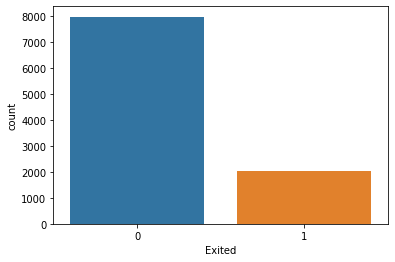

In [23]:
sns.countplot(dataset['Exited'])
plt.show()

#####  Pie chart

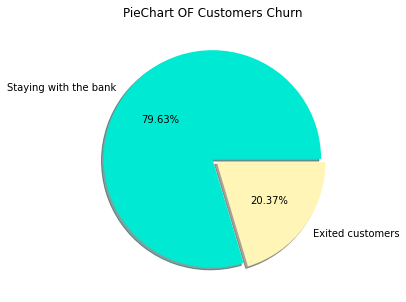

In [24]:
plt.figure(figsize=(5,5))
plt.title("PieChart OF Customers Churn")
plt.pie(dataset['Exited'].value_counts(),
       labels = ['Staying with the bank','Exited customers'],
       autopct ='%.2f%%',
       colors = ['#00EAD3','#FFF5B7'],
       explode=(0.0,0.05),
       shadow = True)
plt.savefig('piechart customer churn.png')
plt.show()


In [25]:
print("Jumlah nasabah yang tetap berlangganan : ",(dataset.Exited==0).sum())
print("Jumlah nasabah yang tutup akun : ",(dataset.Exited==1).sum())

Jumlah nasabah yang tetap berlangganan :  7963
Jumlah nasabah yang tutup akun :  2037


Kita dapat melihat distribusi dari variabel target tidak seimbang yang mana jumlah nasabah yang tutup akun lebih sedikit (20.37%) dari nasabah yang tetap berada di bank (79.63%)

#### a.2. Distribution of numerical data

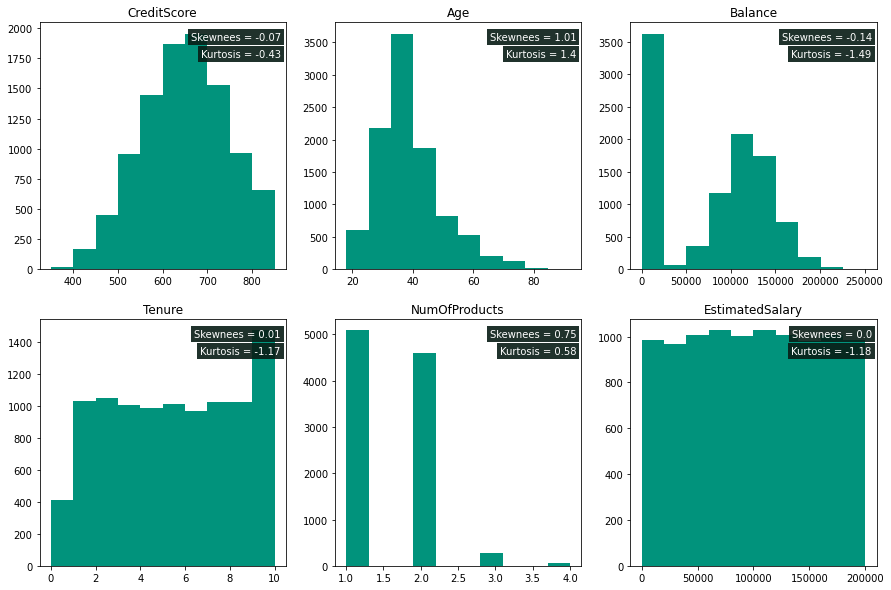

In [26]:
num_df = dataset[['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']]

fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
i=0
for r in range(0,2):
    for c in range(0,3):
        ax[r][c].set_title(num_df.columns[i])
        ax[r][c].hist(num_df.iloc[:,i],color='#01937C')
        ax[r][c].text(0.98,0.96,'Skewnees = '+str(round(num_df.iloc[:,i].skew(),2)),color='white', ha='right', va='top',transform=ax[r][c].transAxes,
                     bbox={'facecolor': '#081c15', 'alpha': 0.9, 'pad': 3, 'edgecolor':'None'})
        ax[r][c].text(0.98,0.89,'Kurtosis = '+str(round(num_df.iloc[:,i].kurt(),2)),color='white', ha='right', va='top',transform=ax[r][c].transAxes,
                     bbox={'facecolor': '#081c15', 'alpha': 0.9, 'pad': 3, 'edgecolor':'None'})
        i+=1

Berikut merupakan ringkasan analisis distribusi variabel numerik berdasarkan hasil dari plotting histogram diatas:
- distribusi dari variabel credit score menunjukan adanya sedikit skewness negatif yang mengindikasikan adanya outlier. Nilai tengah data tidak jauh dari rata ratanya yang berarti data terpusat pada rata rata.
- distribusi pada variabel Age terdapat skewness positif yang mengindikasikan adanya outlier pada data tersebut. dan data terpusat dibawah rata rata
- distribusi dari variabel balance hampir mendekati normal namun terdapat nasabah yang memiliki nilai balance 0 dengan jumlah yang banyak
- distribusi dari variabel Tenure memiliki sedikit skweness
- distribusi dari variabel NumOfProducts memiliki skewness positif yang mana jumlah produk yang sering muncul 1 dan 2
- distribusi dari variabel EstimatedSalary terbilang merata, yang mana nasabah dengan penghasilan 0 - 200000 hampir berjumlah sama.

### b. Bivariate Analysis

Bivariate analysis merupakan analisis yang dilakukan untuk mengetahui hubungan antara 2 variabel. pada tahap bivariate analisis ini kita akan melihat hubungan antara variabel kategori dengan variabel targetnya dan variabel numeric dengan variabel targetnya.

#### b.1 Categorical variabel distribution

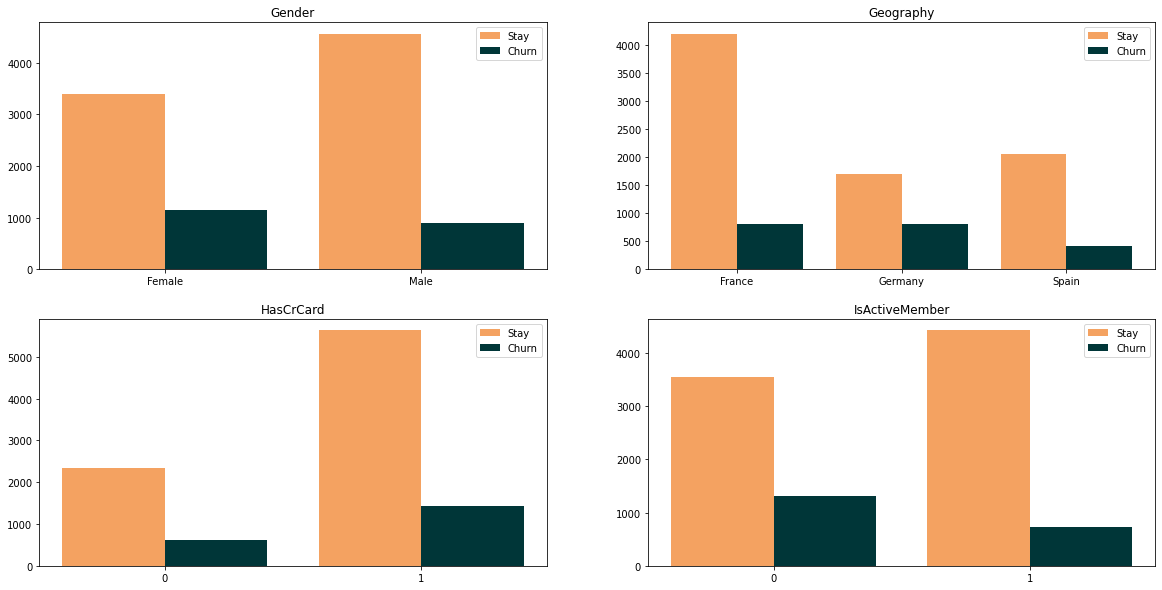

In [27]:
data_bar = dataset[['Gender','Geography','HasCrCard','IsActiveMember','Exited']]

fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,10))
i = 0
for r in range(0,2):
    for c in range(0,2):
        data_group = data_bar.groupby([data_bar.columns[i],'Exited']).size().reset_index()
        x = list(data_group[data_bar.columns[i]].unique())
        x = [str(i) for i in x]
        x_axis = np.arange(len(x))

        y0 = data_group[data_group['Exited']==0].iloc[:,-1]
        y1 = data_group[data_group['Exited']==1].iloc[:,-1]
            
        ax[r][c].bar(x_axis-0.2,y0,0.4,color='#f4a261',label='Stay')
        ax[r][c].bar(x_axis+0.2,y1,0.4,color='#003638',label='Churn')
        ax[r][c].set_xticks(x_axis)
        ax[r][c].set_xticklabels(x)
        ax[r][c].set_title(data_bar.columns[i])
        ax[r][c].legend()
        i+=1
plt.savefig('category vs target.png')
plt.show()

Seperti yang kita ketahui pada univariate analysis bahwa variabel target tidak seimbang yang mana jumlah nasabah yang tetap lebih banyak dibandingkan jumlah nasabah yang pergi. Berikut merupakan ringkasan dari bivariate analysis:

- Pada variabel Gender jumlah laki-laki lebih banyak dibandingkan perempuan, dengan nasabah yang meninggalkan bank lebih banyak perempuan dibanding laki-laki. Hal ini mengindikasikan bahwa variable gender mempengaruhi keputusan dari variabel target.
- Pada Variabel Geography negara France merupakan negara dengan jumlah nasabah terbanyak, dan negara Germany merupakan negara dengan nasabah yang paling sedikit. tetapi berdasarkan nasabah yang keluar dari bank, Germany memiliki jumlah lebih banyak. Variabel Geography juga menandakan dapat mempengaruhi variabel target
- Pada variabel HasCrCard nasabah yang tetap bersama bank memiliki kartu kredit lebih banyak dibandingkan nasabah yang tidak memiliki kartu kredit, begitu juga pada nasabah yang meninggalkan bank. yang mana variable HasCrCard mengindikasikan tidak berpengaruh terhadap variabel target
- Pada variabel isActiveMember, jumlah nasabah yang merupakan anggota tidak aktif cenderung akan meninggalkan bank


#### b.2. Numerical variable exploration

#### Age

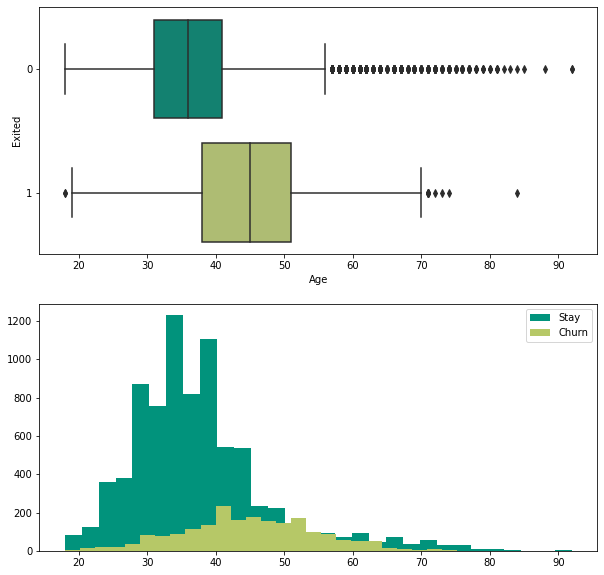

In [28]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.boxplot(x="Age",y="Exited",data=dataset,orient="h",ax=ax1, palette={0:'#01937C',1:'#B6C867'})
ax2.hist(dataset[dataset['Exited']==0][['Age']],bins=30,label="Stay",color='#01937C')
ax2.hist(dataset[dataset['Exited']==1][['Age']],bins=30,label="Churn",color='#B6C867')
plt.legend()
plt.savefig('image/age vs target.png')
plt.show()

#### Credit Score

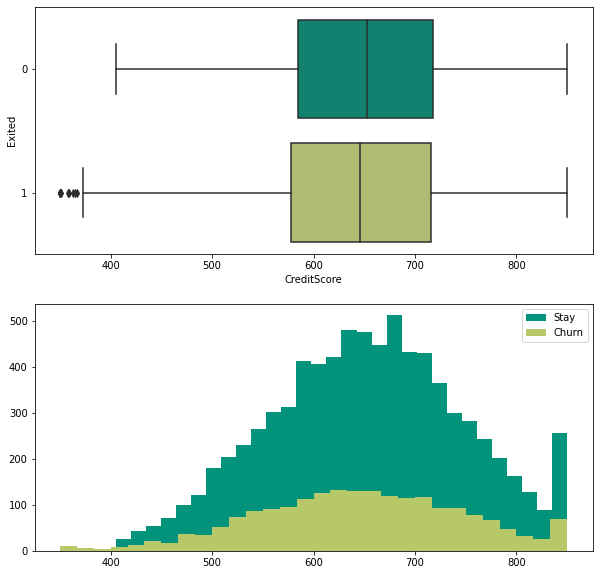

In [29]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.boxplot(x="CreditScore",y="Exited",data=dataset,orient="h",ax=ax1, palette={0:'#01937C',1:'#B6C867'})
ax2.hist(dataset[dataset['Exited']==0][['CreditScore']],bins=30,label="Stay",color='#01937C')
ax2.hist(dataset[dataset['Exited']==1][['CreditScore']],bins=30,label="Churn",color='#B6C867')
plt.legend()
plt.savefig('./image/CreditScore vs target.png')
plt.show()

#### Balance

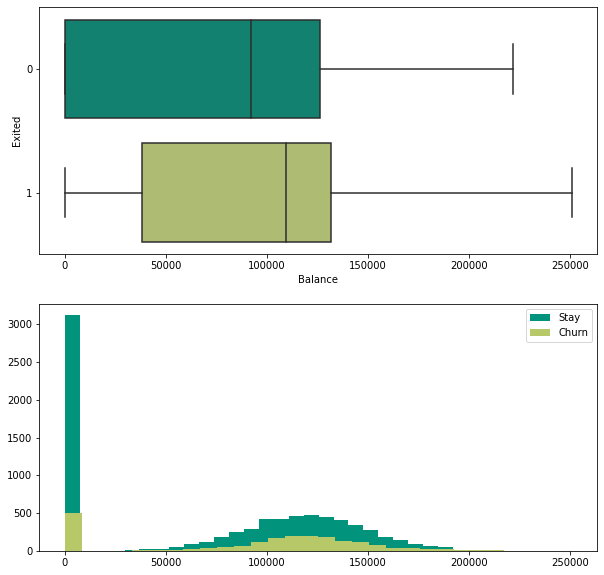

In [30]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.boxplot(x="Balance",y="Exited",data=dataset,orient="h",ax=ax1, palette={0:'#01937C',1:'#B6C867'})
ax2.hist(dataset[dataset['Exited']==0][['Balance']],bins=30,label="Stay",color='#01937C')
ax2.hist(dataset[dataset['Exited']==1][['Balance']],bins=30,label="Churn",color='#B6C867')
plt.legend()
plt.savefig('./image/Balance vs target.png')
plt.show()

#### Tenure

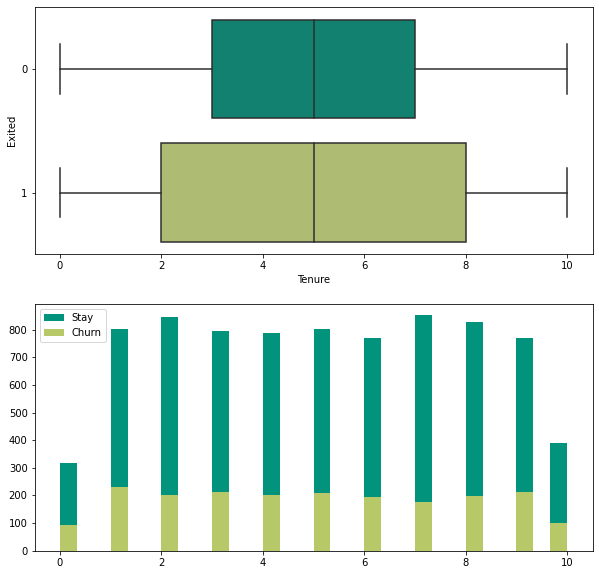

In [31]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.boxplot(x="Tenure",y="Exited",data=dataset,orient="h",ax=ax1, palette={0:'#01937C',1:'#B6C867'})
ax2.hist(dataset[dataset['Exited']==0][['Tenure']],bins=30,label="Stay",color='#01937C')
ax2.hist(dataset[dataset['Exited']==1][['Tenure']],bins=30,label="Churn",color='#B6C867')
plt.legend()
plt.savefig('./image/Tenure vs target.png')
plt.show()

#### NumOfProducts

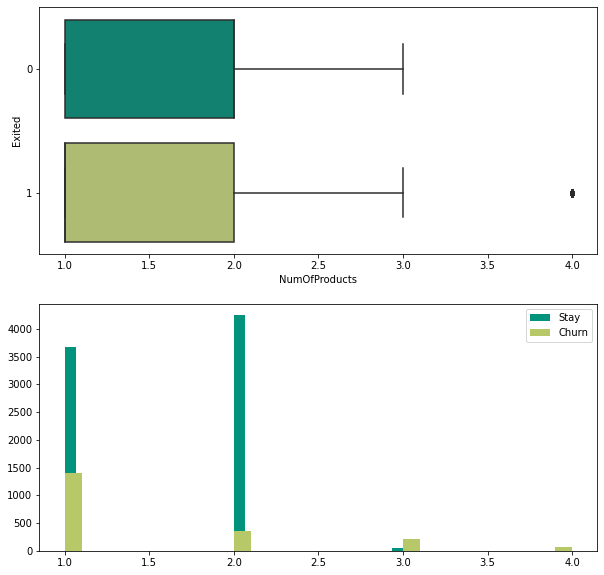

In [32]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.boxplot(x="NumOfProducts",y="Exited",data=dataset,orient="h",ax=ax1, palette={0:'#01937C',1:'#B6C867'})
ax2.hist(dataset[dataset['Exited']==0][['NumOfProducts']],bins=30,label="Stay",color='#01937C')
ax2.hist(dataset[dataset['Exited']==1][['NumOfProducts']],bins=30,label="Churn",color='#B6C867')
plt.legend()
plt.savefig('./image/NumOfProducts vs target.png')
plt.show()

#### Estimated salary

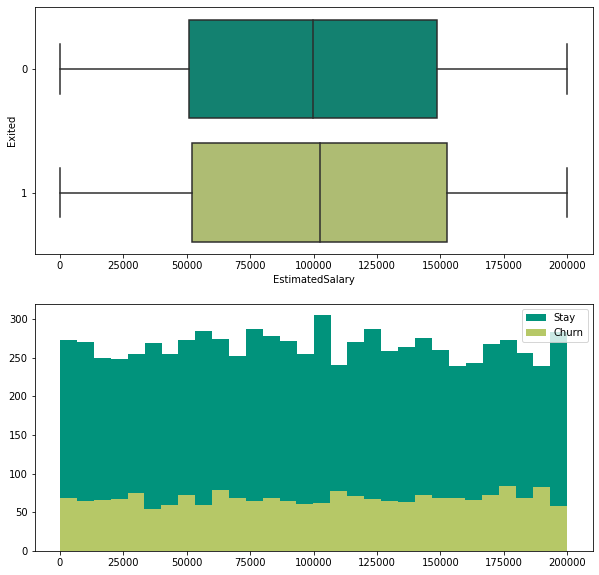

In [33]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.boxplot(x="EstimatedSalary",y="Exited",data=dataset,orient="h",ax=ax1, palette={0:'#01937C',1:'#B6C867'})
ax2.hist(dataset[dataset['Exited']==0][['EstimatedSalary']],bins=30,label="Stay",color='#01937C')
ax2.hist(dataset[dataset['Exited']==1][['EstimatedSalary']],bins=30,label="Churn",color='#B6C867')
plt.legend()
plt.savefig('./image/EstimatedSalary vs target.png')
plt.show()

Berdasarkan hasil dari bivariate analysis diatas menujukan bahwa
- pada variabel Age, distribusi dari Stay dan Exited memiliki pemusatan data (nasabah dengan rata rata umur yang lebih tua cenderung akan meninggalkan bank) yang berbeda dimana perubahan nilai pada variabel age akan berpengaruh terdapat variabel target atau terdapat kecenderungan bahwa nasabah akan meninggalkan bank berdasarkan variabel Age
- pada variabel Balance, nasabah yang memiliki jumlah uang yang tersedia untuk penarikan lebih banyak cenderung akan meninggalkan bank, sehingga variabel Balance diduga mempunyai pengaruh lebih terhadap keputusan target.
- pada variabel NumOfProducts, antara Stay dan Exited memiliki pemusatan data yang sama, namun nasabah dengan jumlah produk 3 dan 4 cenderung akan meninggalkan bank.
- sedangkan pada variabel CreditScore, Tenure dan EstimatedSalary, distribusi dari churn dan not churn memiliki pemusatan data yang relative sama, dimana hal ini mengindikasikan bahwa perubahan nilai pada variabel tersebut tidak terlalu berpengaruh terhadap variabel target atau tidak ada kecenderungan bahwa nasabah akan meninggalkan bank


### c. Multivariate Analysis

Multivariate analysis merupakan analisis yang bertujuan untuk mengetahui hubungan lebih dari 2 variabel. Pada tahap analisis ini kita akan melihat nilai korelasi dari setiap dependent variable dengan independent variable

#### Correlation of numerical variable

In [34]:
data_cor =  pd.get_dummies(dataset2,drop_first=True)

In [35]:
corr = data_cor.corr()

#### Correlation with bar chart

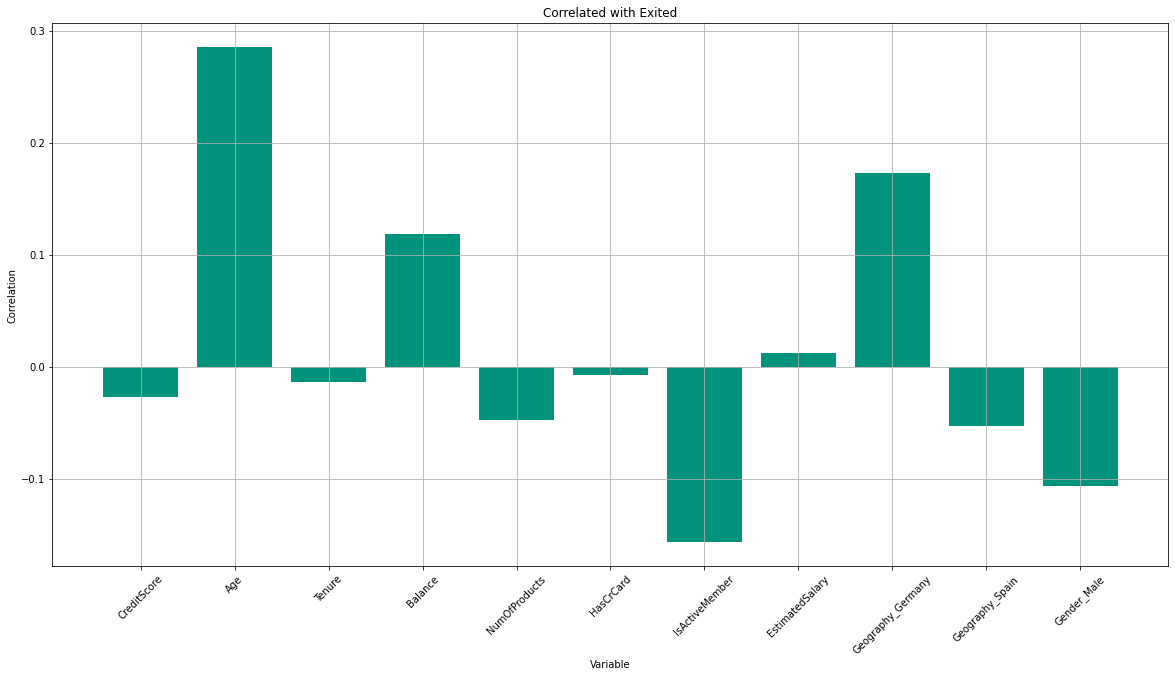

In [36]:
corr0 = corr.drop(index=['Exited'])[['Exited']]
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(corr0.index[:],corr0.iloc[:,0].values,color='#01937C')


plt.title("Correlated with Exited")
plt.xlabel("Variable")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('correlation.png')
plt.show()

#### correlation with heatmap

<AxesSubplot:>

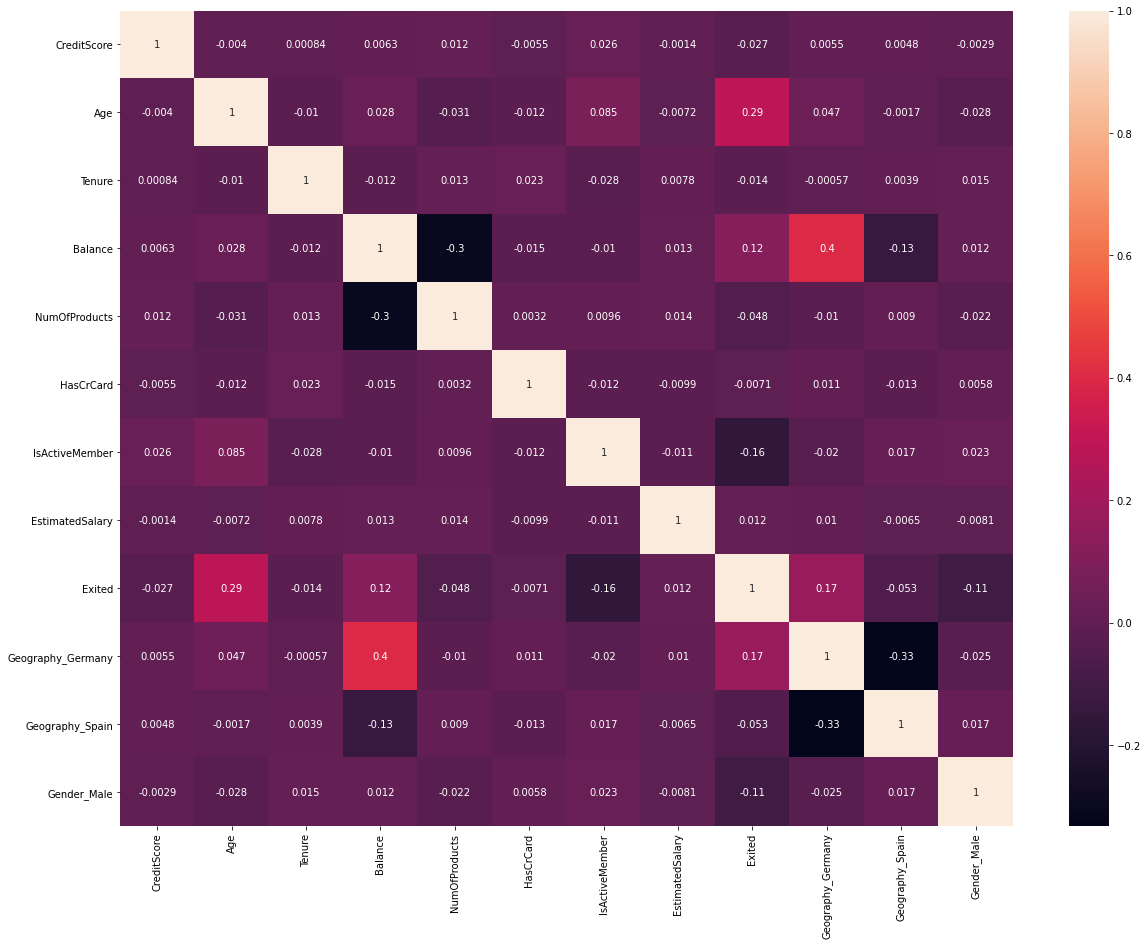

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)

Berdasarkan hasil dari plotting diatas, hubungan antara dependent variable dengan variabel targetnya memiliki nilai korelasi yang relatif kecil, yaitu diantara -0.15 sampai 0.3. variabel yang memiliki nilai korelasi lebih tinggi dibanding variabel lain dan kemungkinan akan berpengaruh terhadap hasil dari variabel target yaitu Age, Balance, NumOfProduct, IsActiveMember, dan Geography.

## 3. Data Preprocessing

Sebelum membangun model untuk klasifikasi, akan dilakukan tahap preprocessing terlebih dahulu untuk setiap feature yang ada. tahap data processing tersebut diantaranya:
- Handling outlier
- Features scaling
- Features encoding
- Splitting dataset to x and y
- Feature selection
- Splitting dataset to train and test

### a. Handling Outlier

In [38]:
column = ['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']
numeric_data = dataset[column]

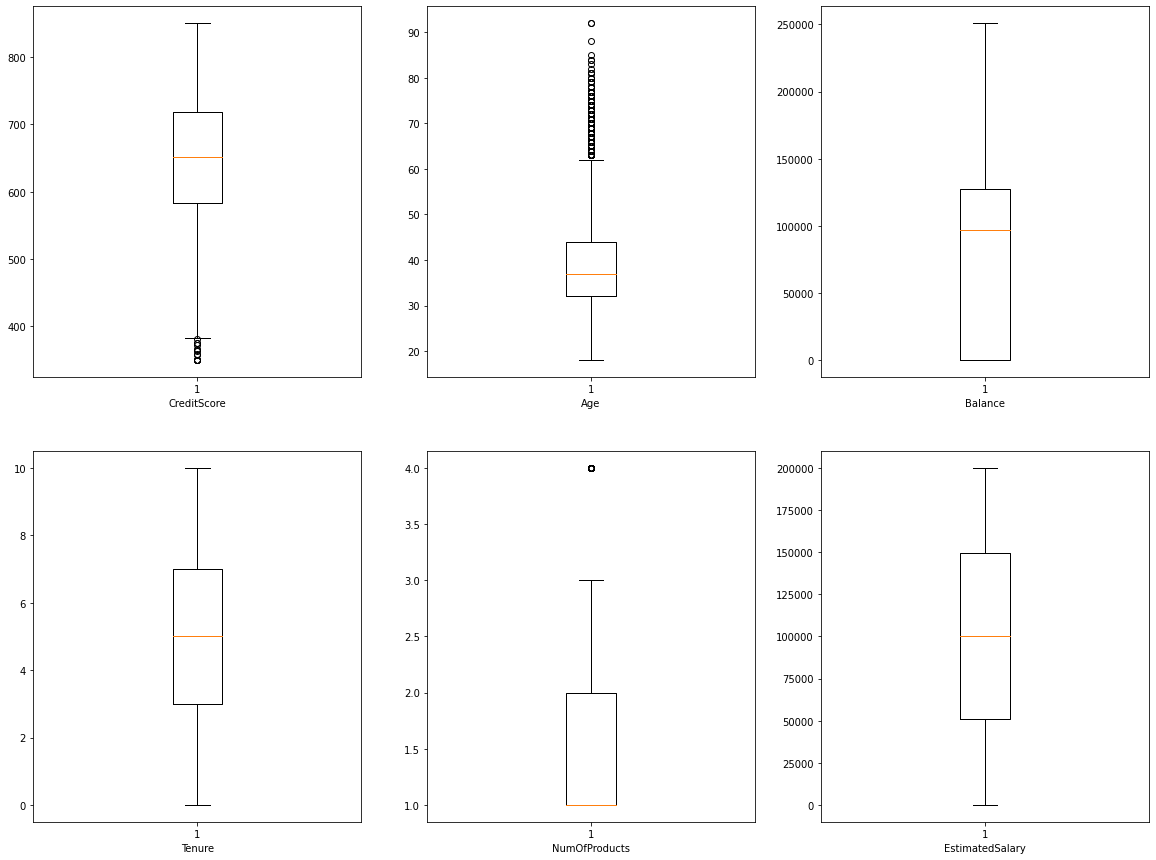

In [39]:
plt.subplots(figsize=(20,15))
for i in range(0,len(numeric_data.columns)):
    plt.subplot(2,3,i+1)
    plt.boxplot(numeric_data.iloc[:,i])
    plt.xlabel(numeric_data.columns[i])
plt.show()

#### Discover outlier with interquartile

In [40]:
def interquartile(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    lower_bound= q1 - (iqr * 1.5)
    upper_bound= q3 + (iqr * 1.5)
    return lower_bound,upper_bound

def drop_outlier(x,column):
    lower_bound,upper_bound = interquartile(x[column])
    removed = x[~((x[column]<lower_bound) | (x[column]>upper_bound)).any(axis=1)]
    return removed

In [41]:
drop_column = ['CreditScore']
outlier_droped= drop_outlier(dataset,drop_column).reset_index().drop(columns=['index'],axis=1)

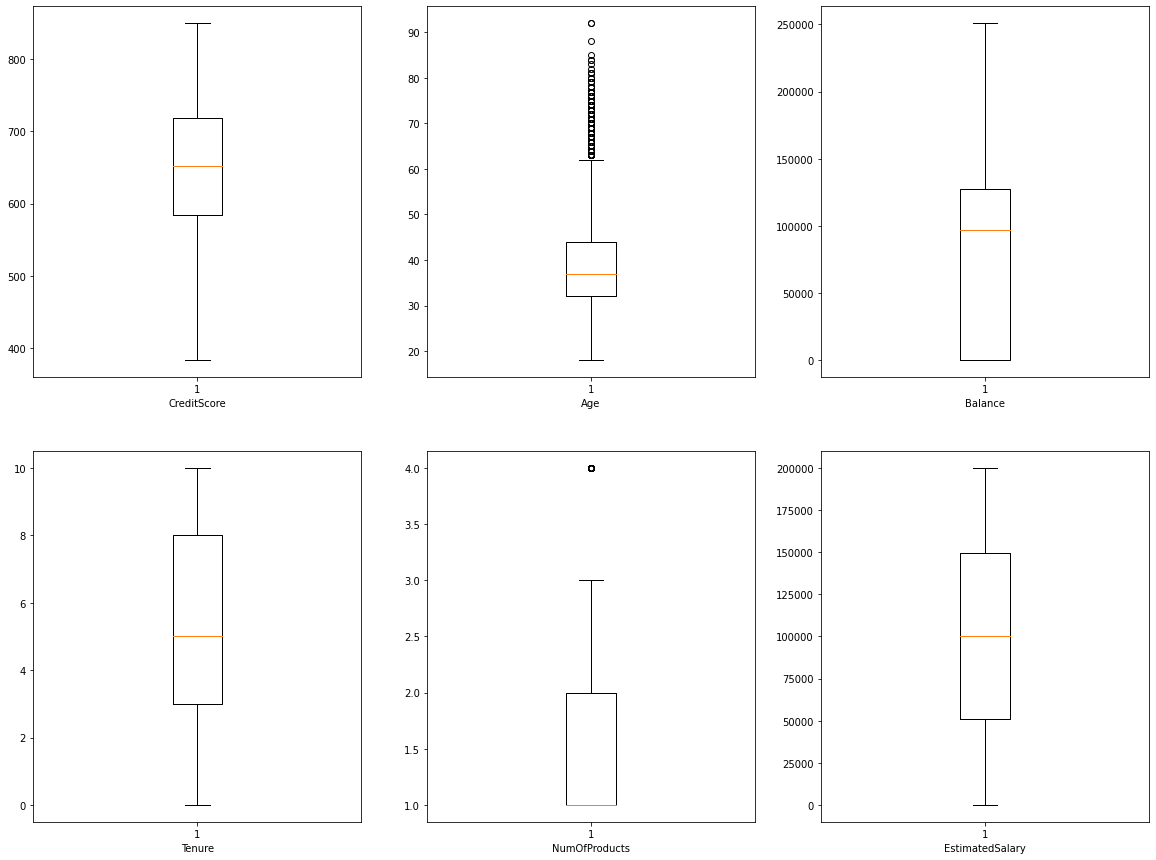

In [42]:
column = ['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']
numeric_data = outlier_droped[column]
plt.subplots(figsize=(20,15))
for i in range(0,len(numeric_data.columns)):
    plt.subplot(2,3,i+1)
    plt.boxplot(numeric_data.iloc[:,i])
    plt.xlabel(numeric_data.columns[i])
plt.show()

Berdasarkan hasil box plotting, features yang memiliki nilai outlier pada dataset yaitu Credit Score. Untuk menemukan pencilan data tersebut kita menggunakan teknik interquartile range dan nilai pencilan tersebut akan dihapus dari dataset. pada varibel age terdapat nilai pencilan namun nilai pencilan tersebut masih dalam range umur yang normal, sehingga menurut kami hal ini tidak perlu dihilangkan dari dataset

### b. Features Scaling

Untuk membuat performa terbaik pada model klasifikasi, kita perlu melakukan features scaling. Feature scaling merupakan sebuah teknik untuk membuat semua feature pada dataset mempunyai rentang nilai yang sama. salah satu teknik feature scaling yang populer adalah standardization, atau membuat range semua feature sama yaitu dengan nilai mean 0 dan standard deviasi 1

In [43]:
column_numeric = ['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']
sc = StandardScaler().fit(outlier_droped[column_numeric])
std = pd.DataFrame(sc.transform(outlier_droped[column_numeric]),columns=column_numeric)

### c. Features Encoding

Sedangkan untuk categorical variable, kita perlu untuk melakukan encoding untuk setiap feature yang bertipe kategori. Dikarenakan pada setiap feature kategori tidak mempunyai tingkatan level maka teknik yang akan digunakan yaitu one hot encoding atau merubah nilai kategori menjadi 0 atau 1.

In [44]:
column_category = ['Geography','Gender','HasCrCard','IsActiveMember']
dataset_std = outlier_droped[column_category]

In [45]:
encoder = OneHotEncoder(drop='first',sparse=False,handle_unknown='error').fit(dataset_std)
encoded = encoder.transform(dataset_std)

In [46]:
df_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names(column_category))

### d. Split Dataset to X and Y

In [47]:
dataset_fe = pd.concat([std,df_encoded],axis=1)
target = outlier_droped.astype({'Exited':int})

In [48]:
x = dataset_fe
y = target.iloc[:,-1]

### e. Features Selection

Untuk menentukan bahwa nasabah tetap tinggal atau pergi yaitu dengan menggunakan feature sebagai dependent variable, namun tidak semua feature memiliki pengaruh yang sama terhadap variabel target. Hal ini dapat mengakibatkan turunnya performa pada model klasifikasi, untuk itu kita perlu memilih beberapa feature yang dianggap berpengaruh terhadap keputusan target. Salah satu teknik yang digunakan dalam pemilihan feature ini yaitu SelectKBest atau memilih k jumlah feature terbaik, serta menggunakan statistical test untuk menguji setiap feature. chi squared digunakan untuk menguji categorical varible dan f_classif atau ANOVA untuk numerical variable

#### 1. f_classif (ANOVA) for numerical variable

In [49]:
x_num =  x[column_numeric]

In [50]:
selectorK = SelectKBest(score_func=f_classif,k=3)
x_k = selectorK.fit(x_num,y)

f_score = selectorK.scores_
p_value = selectorK.pvalues_

In [51]:
columns = list(x_num.columns)
print("")
print("")
print("  Feature        ","        F-Score    ","P-Values")
print("  -------        ", "        -------    ","--------")

for i in range(0,len(columns)):
    f1 = "%4.2f" % f_score[i]
    p1 = "%2.6f" % p_value[i]
    print(" ", columns[i].ljust(22), f1.rjust(9), p1.rjust(12))

cols = selectorK.get_support(indices=True)
num_selectedCols = x_num.columns[cols].to_list()
num_non_selectedCols = x_num.drop(columns=num_selectedCols).columns
print("kolom yang akan dihilangkan = ",num_non_selectedCols)



  Feature                 F-Score     P-Values
  -------                 -------     --------
  CreditScore                 3.38     0.066219
  Age                       883.46     0.000000
  Balance                   142.22     0.000000
  Tenure                      1.71     0.191237
  NumOfProducts              23.13     0.000002
  EstimatedSalary             1.03     0.309504
kolom yang akan dihilangkan =  Index(['CreditScore', 'Tenure', 'EstimatedSalary'], dtype='object')


Berdasarkan hasil dari feature important(F-Score) menggunakan scoring f_classif atau ANOVA, maka features pada numerical variabel yang akan digunakan yaitu Age dan Balance

#### 2. chi squared for categorical variable

In [52]:

selectorK = SelectKBest(score_func=chi2,k=4)
x_k = selectorK.fit(df_encoded,y)

f_score = selectorK.scores_
p_value = selectorK.pvalues_

In [53]:
columns = list(df_encoded.columns)
print("")
print("")
print("  Feature        ","        F-Score    ","P-Values")
print("  -------        ", "        -------    ","--------")

for i in range(0,len(columns)):
    f1 = "%4.2f" % f_score[i]
    p1 = "%2.6f" % p_value[i]
    print(" ", columns[i].ljust(22), f1.rjust(9), p1.rjust(12))

cols = selectorK.get_support(indices=True)
cat_selectedCols = df_encoded.columns[cols].to_list()
non_cat_selectedCols = df_encoded.drop(columns=cat_selectedCols).columns
print("kolom yang akan dihilangkan = ",non_cat_selectedCols)



  Feature                 F-Score     P-Values
  -------                 -------     --------
  Geography_Germany         226.54     0.000000
  Geography_Spain            21.47     0.000004
  Gender_Male                51.38     0.000000
  HasCrCard_1                 0.20     0.655792
  IsActiveMember_1          116.58     0.000000
kolom yang akan dihilangkan =  Index(['HasCrCard_1'], dtype='object')


Berdasarkan hasil dari P-values yang mana jika P-Values>0.05 maka variabel tersebut dianggap tidak berpengaruh terhadap keputusan target, oleh karena itu features pada categorical variabel yang akan digunakan yaitu Geography, Gender, NumofProduct dan IsActiveMember

In [54]:
features_selected = x[num_selectedCols+cat_selectedCols]

### f. Oversampling

Sebelumnya pada univariate analysis, variabel target mengalami imbalanced data atau jumlah nasabah yang tetap tinggal lebih banyak dibandingkan dengan jumblah nasabah yang pergi. Hal ini dapat mempengaruhi model klasifikasi yang kemungkinan akan cenderung mengenali nasabah yang tetap tinggal saja, namun kita ingin model yang dibangun dapat dengan baik memprediksi nasabah yang pergi untuk dapat mengantisipasinya.

Untuk itu kita perlu melakukan treatment pada data, yaitu dengan menggunakan oversampling atau menambahkan data pada class minor, salah satu teknik oversampling yang digunakan yaitu SMOTE (Synthetic Minority Oversamoling Technique). SMOTE menemukan k-nearest neighbors terdekat dari setiap data minoritas, lalu secara acak memilih salah satu dari mereka dan menghitung interpolasi liniear untuk menghasilkan data minoritas baru di lingkungan tersebut

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smote = SMOTE(sampling_strategy=0.75,random_state=1234)
x_smote,y_smote = smote.fit_resample(features_selected,y) 

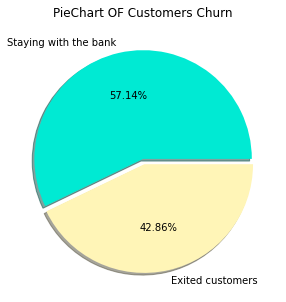

In [57]:
plt.figure(figsize=(5,5))
plt.title("PieChart OF Customers Churn")
plt.pie(y_smote.value_counts(),
       labels = ['Staying with the bank','Exited customers'],
       autopct ='%.2f%%',
       colors = ['#00EAD3','#FFF5B7'],
       explode=(0.0,0.05),
       shadow = True)
plt.savefig('customer churn after oversampling.png')
plt.show()

### g. Splitting data to train and test set

Setelah mendapatkan feature yang akan digunakan untuk model klasifikasi, kita akan membagi dataset menjadi train dan test. trainset disini berfungsi untuk melatih data dan mendapatkan parameter yang optimal pada model klasifikasi, sedangkan untuk test set berfungsi untuk evaluasi final pada model klasifikasi.

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size=0.2,stratify=y_smote,random_state=1234)

## 4. Build Predictive Model

Setelah semua data siap digunakan untuk melatih model klasifikasi, selanjutnya yaitu membangun model untuk prediksi klasifikasi, yang mana pada project ini akan menggunakan 3 model klasifikasi dan memilih satu terbaik dari 3 model klasifikasi. 3 model tersebut yaitu XGBoost, Logistic Regression, dan Support Vector Machine.

Untuk mendapatkan parameter terbaik dari setiap model, kita menggunakan RandomizedSearchCV untuk mencari secara acak kombinasi dari setiap parameter yang diberikan dengan 10 Cross validation.

#### a, XGBoost

In [59]:
xgb = XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)

In [60]:
xgb_params = {"colsample_bytree": [0.3, 0.5, 0.7, 0.9, 1],
              "gamma": [0, 0.5,0.25, 1],
              "learning_rate": [0.1,0.2,0.3],
              "max_depth": [4,6,8],
              "n_estimators":[100,200,300]
             }

In [61]:
xgb_grid = RandomizedSearchCV(xgb,
                       param_distributions=xgb_params,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1,
                        random_state=123,
                       return_train_score=True)

In [62]:
xgb_fit = xgb_grid.fit(x_train,y_train)

In [63]:
xgb_result = pd.DataFrame.from_dict(xgb_fit.cv_results_)

##### Testing model using the best XGBoost parameters

In [64]:
xgb_fit.best_params_

{'n_estimators': 300,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 1,
 'colsample_bytree': 0.9}

In [65]:
xgb_final = XGBClassifier(colsample_bytree= 0.7, gamma= 1, learning_rate= 0.1, max_depth =4,n_estimators=100,eval_metric='mlogloss',use_label_encoder=False)

In [66]:
xgb_final.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='mlogloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [67]:
xgb_y_pred = xgb_final.predict(x_test)

In [68]:
xgb_acc = accuracy_score(y_test,xgb_y_pred)
xgb_f1 = f1_score(y_test,xgb_y_pred)
xgb_prec = precision_score(y_test,xgb_y_pred)
xgb_recall = recall_score(y_test,xgb_y_pred)
xgb_cm = confusion_matrix(y_test,xgb_y_pred)

#### b. Logistic Regression

In [69]:
lr = LogisticRegression()

In [70]:
lr_params = { 'C':[0.5, 0.75, 1.0, 1.25, 1.5],
             'penalty':['l2'],
             'solver':['lbfgs', 'liblinear', 'sag']}

In [71]:
lr_grid = RandomizedSearchCV(estimator=lr,
                          param_distributions=lr_params,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1,
                          random_state=123,
                          return_train_score=True)

In [72]:
lr_fit = lr_grid.fit(x_train,y_train)

In [73]:
lr_result= pd.DataFrame.from_dict(lr_fit.cv_results_)

##### Testing model using the best Logistic Regression parameters

In [74]:
lr_fit.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.5}

In [75]:
lr_final = LogisticRegression(solver='liblinear',penalty='l2',C=0.75)
lr_final.fit(x_train,y_train)

LogisticRegression(C=0.75, solver='liblinear')

In [76]:
lr_y_pred = lr_final.predict(x_test)

In [77]:
lr_acc = accuracy_score(y_test,lr_y_pred)
lr_f1 = f1_score(y_test,lr_y_pred)
lr_prec = precision_score(y_test,lr_y_pred)
lr_recall = recall_score(y_test,lr_y_pred)
lr_cm = confusion_matrix(y_test,lr_y_pred)

#### c. Support Vector Machine

In [78]:
svm = SVC(random_state=1234)

In [79]:
svm_param ={'C':[0.1,0.5,1,2,5,10],
            'kernel':['rbf','linear'],
            'gamma':[0.1, 0.25, 0.5,1 , 2 ,5 ]}

In [80]:
svm_grid =  RandomizedSearchCV(svm,
                                param_distributions=svm_param,
                                scoring='accuracy',
                                cv=10,
                                n_jobs=-1,
                                random_state=123,
                                return_train_score=True)

In [81]:
svm_fit = svm_grid.fit(x_train,y_train)

In [82]:
svm_result = pd.DataFrame.from_dict(svm_fit.cv_results_)

##### Testing model using the best SVM parameters

In [83]:
svm_fit.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 5}

In [84]:
svm_final = SVC(kernel='rbf',gamma=0.25,C=1)
svm_final.fit(x_train,y_train)

SVC(C=1, gamma=0.25)

In [85]:
svm_y_pred = svm_final.predict(x_test)

In [86]:
svm_acc = accuracy_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)
svm_prec = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_cm = confusion_matrix(y_test,svm_y_pred)

#### d. Model comparison

In [87]:
df_dict = {'Model':['XGBoost','Logistic Regression','Support Vector Machine'],
          'Accuracy':[xgb_acc, lr_acc, svm_acc],
          'F1_score':[xgb_f1, lr_f1, svm_f1],
          'Precision':[xgb_prec, lr_prec, svm_prec],
          'Recall':[xgb_recall, lr_recall, svm_recall]}

In [88]:
result_df = pd.DataFrame(df_dict)
result_df

,Model,Accuracy,F1_score,Precision,Recall
0,XGBoost,0.839254,0.804024,0.841575,0.769682
1,Logistic Regression,0.703983,0.629213,0.678952,0.586265
2,Support Vector Machine,0.789738,0.738393,0.790631,0.692630


In [89]:
print("Confusion matrix XGBoost:")
print(xgb_cm)

Confusion matrix XGBoost:
[[1420  173]
 [ 275  919]]


Berdasarkan hasil dari perbandingan 3 model klasifikasi, model yang akan digunakan untuk Bank customers churn prediction adalah XGBoost, yang mana model ini memiliki nilai akurasi dan f1_score terbaik dibanding 2 model lainnya.

Jika kita melihat kembali tujuan awal dari project ini yaitu untuk mengantisipasi nasabah pergi, untuk itu kita berusaha untuk memaksimalkan nilai recall atau meminimalisir false negative dengan menyesuaikan threshold yang menentukan hasil prediksi itu 0 atau 1

### ROC_AUC CURVE

In [90]:
xgb_yprob = xgb_final.predict_proba(x_test)

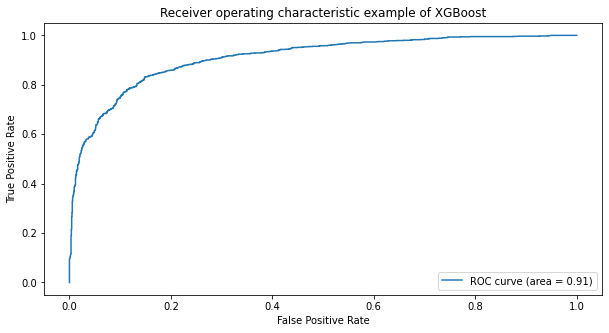

In [91]:
fpr, tpr, threshold = roc_curve(y_test,xgb_yprob[:,1])
roc_auc = auc(fpr,tpr)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example of XGBoost')
ax.legend(loc='lower right')
plt.show()


### Features important

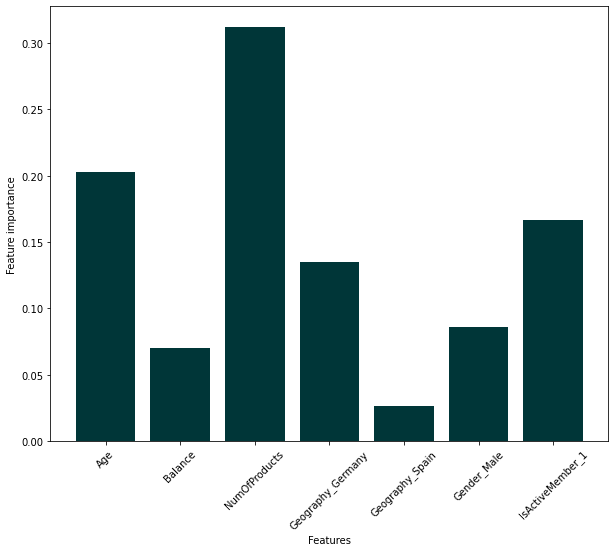

In [92]:
plt.figure(figsize=(10,8))
plt.bar(features_selected.columns,xgb_final.feature_importances_,color='#003638')
plt.xlabel("Features")
plt.ylabel("Feature importance")
plt.xticks(rotation=45)
plt.show()

### XGBoost threshold tuning

#### Find optimal threshold

In [93]:
precision, recall, thresholds = precision_recall_curve(y_test, xgb_yprob[:,1])

fscore = (2 * precision * recall) / (precision + recall)

index = np.argmax(fscore)
thresholdOpt = round(thresholds[index],4)
fscoreOpt = round(fscore[index],4)
recallOpt = round(recall[index],4)
precisionOpt = round(precision[index],4)

print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt,fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt,precisionOpt))

Best Threshold: 0.42969998717308044 with F-Score: 0.819
Recall: 0.8317, Precision: 0.8067


#### Precision-Recall curve

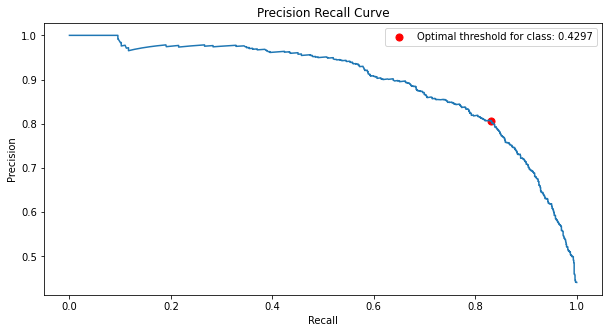

In [94]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(recall,precision, )
ax.scatter(recallOpt,precisionOpt,color='r',s=50,label='Optimal threshold for class: %0.4f' %thresholdOpt)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision Recall Curve')
ax.legend(loc='upper right')
plt.show()

Dengan menggunakan kurva Precision-Recall dan F1-score, menghasilkan nilai Threshold 0,3366 untuk menentukan apakah pengamatan yang diberikan termasuk kelas mayor atau minor.

In [132]:
y_adjust = []
for y0 in xgb_yprob[:,1]:
    if y0 >=thresholdOpt:
        y_adjust.append(1)
    else:
        y_adjust.append(0)

In [133]:
confusion_matrix(y_test,y_adjust)

array([[1355,  238],
       [ 202,  992]], dtype=int64)

In [134]:
print(classification_report(y_test,y_adjust))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.81      0.83      0.82      1194

    accuracy                           0.84      2787
   macro avg       0.84      0.84      0.84      2787
weighted avg       0.84      0.84      0.84      2787



In [131]:
adjusted_th = {'Model':['Adjusted XGBoost threshold'],
          'Accuracy':[accuracy_score(y_test,y_adjust)],
          'F1_score':[f1_score(y_test,y_adjust)],
          'Precision':[precision_score(y_test,y_adjust)],
          'Recall':[recall_score(y_test,y_adjust)]}
df_adjusted_th = result_df.append(pd.DataFrame(adjusted_th)).reset_index(drop=True)
df_adjusted_th

,Model,Accuracy,F1_score,Precision,Recall
0,XGBoost,0.839254,0.804024,0.841575,0.769682
1,Logistic Regression,0.703983,0.629213,0.678952,0.586265
2,Support Vector Machine,0.789738,0.738393,0.790631,0.692630
3,Adjusted XGBoost threshold,0.778256,0.780540,0.677559,0.920436


dengan menggunakan threshold 0.3366 maka nilai dari recall dapat lebih maksimal dibandingkan dengan threshold 0.5, yang berarti bahwa model lebih sering memprediksi nasabah yang pergi, untuk itu pihak bank dapat fokus kepada nasabah yang terindikasi pergi meninggalkan bank

## 5. Final Model

#### Saving features used

In [99]:
joblib.dump(features_selected.columns,'features_selected.pkl')

['features_selected.pkl']

#### Saving StandardScaler

In [100]:
joblib.dump(sc,'standardscaler.pkl')

['standardscaler.pkl']

#### Saving One Hot Encoder

In [101]:
joblib.dump(encoder,'encoder.pkl')

['encoder.pkl']

#### Saving the XGBoost model

In [102]:
joblib.dump(xgb_final,'xgb_model.pkl')

['xgb_model.pkl']

## 6. Pediction Single Observation

### a. Load data, model, standard scaler, one hot encoder, and selected features

In [103]:
features = joblib.load('features_selected.pkl')
sc = joblib.load('standardscaler.pkl')
encoder = joblib.load('encoder.pkl')
model = joblib.load('xgb_model.pkl')
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### b. Drop columns that not used for prediction

In [104]:
data_droped = data.drop(columns=['RowNumber','CustomerId','Surname'])

### c. Change datatypes

In [105]:
data_changed = data_droped.astype({"Geography":'category',"Gender":'category',"HasCrCard":'category',"IsActiveMember":'category',"Exited":'category'})

### d. Select single observation randomly

In [106]:
idx = random.randint(0,len(data_changed))
single_data = data_changed.iloc[idx,:]
single_data

CreditScore              686
Geography            Germany
Gender                  Male
Age                       33
Tenure                     9
Balance            141918.09
NumOfProducts              2
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    184036.47
Exited                     0
Name: 8360, dtype: object

### e. Feature Engineering

#### Data Scaling 

In [107]:
column_numeric = ['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']
data_numeric = single_data[column_numeric]

In [108]:
data_numeric_arr = np.array(data_numeric).reshape(1,-1)

In [109]:
std = sc.transform(data_numeric_arr)

In [110]:
for i,col in enumerate(column_numeric):
    data_numeric[col] = std[0][i]

#### Data encoding

In [111]:
column_category = ['Geography','Gender','HasCrCard','IsActiveMember']
data_category = single_data[column_category]

In [112]:
data_category_arr = np.array(data_category).reshape(1,-1)

In [113]:
encoded = encoder.transform(data_category_arr)

In [114]:
data_fe = data_numeric
for i,col in enumerate(encoder.get_feature_names(column_category)):
    data_fe[col] = encoded[0][i]

#### Features Selection

In [116]:
features_selected = data_fe[features]
target = single_data['Exited']

In [117]:
features_selected

Age                  -0.56405
Balance               1.04896
NumOfProducts        0.808782
Geography_Germany         1.0
Geography_Spain           0.0
Gender_Male               1.0
IsActiveMember_1          1.0
Name: 8360, dtype: object

### f. Pediction Bank Customer

In [118]:
pred = model.predict_proba(np.array(features_selected).reshape(1,-1))

In [119]:
if pred[0,1] >= thresholdOpt:
    print("Hasil Prediksi: Chrun")
else:
    print("Hasil Prediksi nasabah: Stay")
    
print("=================================")
if target == 0:
    print("Actual target nasabah: Stay")
else:
    print("Actual target Prediksi: Chrun")

Hasil Prediksi nasabah: Stay
Actual target nasabah: Stay


## 7. Conclusion

Kesimpulan dari project ini adalah sebagai berikut:
- Jumlah nasabah yang tetap bersama bank lebih banyak dibandingkan jumlah nasabah yang pergi dari bank (79.63 : 20.37), sehingga untuk dapat menghasilkan model yang optimal perlu dilakukan oversampling serta threshold tuning pada model
- Berdasarkan hasil dari Exploratory Data Analysis dan model feature importances, karakteristik dari nasabah yang dapat mempengaruhi bahwa nasabah tetap tinggal atau pergi yaitu :
    1. NumOfProducts: nasabah dengan jumlah produk 3 atau 4 cenderung akan meninggalakan bank
    2. Age: nasabah dengan rata - rata umur yang lebih tua cenderung akan meninggalkan bank
    3. isActiveMember: nasabah yang tidak aktif cenderung akan meninggalkan bank
    4. Geography: nasabah yang tinggal di Germany lebih banyak menginggalkan bank
    5. Gender: gender female memiliki presentase untuk meninggalkan bank lebih tinggi dibandingkan gender male
    6. Balance: nasabah yang memiliki jumlah uang yang tersedia untuk penarikan lebih banyak cenderung akan meninggalkan bank
- Model machine learning terbaik yaitu XGBoost Classifier yang dapat memprediksi nasabah tetap tinggal atau pergi dengan menggunakan data diri sebagai feature.
- Hasil evaluasi model machine learning akhir yaitu Accuracy: 84.21%, F1 Score: 81.84%, Precision: 80.65%,dan Recall: 83.08%. Dikarenakan tujuan awal kita adalah untuk mengantisipasi bahwa nasabah keluar dari bank, untuk itu dengan hasil evaluasi model tersebut nilai True positive rate atau recall atau seberapa sering model tersebut memprediksi yes sudah cukup baik.
- Untuk melakukan single prediction diperlukan tahap sebagai berikut:
    1. Load data, model, standard scaler, one hot encoder, and selected features
    2. Drop 'RowNumber','CustomerId','Surname' columns
    3. Feature engineering
        - Data scaling
        - Data encoding
        - features selection
    4. Prediction

Adapun file terlampir dari hasil project ini:
- xgb_model.pkl : file model XGBoost yang sudah dilatih dan siap digunakan
- standardscaler.pkl : file standard scaler untuk normalisasi variabel numerik
- encoder.pkl : file one hot encoder untuk encoding variabel kategori
- features_selected : file list feature yang digunakan untuk melakukan prediksi

<h1 align='center'> End <h1>